In [6]:
import pandas as pd
pd.set_option("display.max_rows", 500)
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize

from sklearn import metrics
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV

In [7]:
data = pd.read_excel("Final Project Data.xlsx", skiprows=1).drop("Unnamed: 10", axis=1)

In [8]:
data.head()
# Train Data:2019-1	2019-2	2019-3	2019-4	2019-5	2019-6	2019-7	2019-8	2019-9
# Test Data:2019-10	2019-11	2019-12	2020-1	2020-2

,Customer ID,2019-1,2019-2,2019-3,2019-4,2019-5,2019-6,2019-7,2019-8,2019-9,2019-10,2019-11,2019-12,2020-1,2020-2
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,5,1,0,1,0,0,0,1,0,0,0,0,1,0,0


### Cohort survival rates over months

In [5]:
survival_rates = data.drop("Customer ID", axis=1).sum()
survival_rates = pd.DataFrame(survival_rates).rename({0:"Number of Custumer"},axis=1)
survival_rates["Survival Rate"] = (survival_rates["Number of Custumer"] / survival_rates.loc["2019-1", "Number of Custumer"])

In [6]:
survival_rates["term"] = survival_rates["Number of Custumer"].rank(ascending=False).astype(int) -1

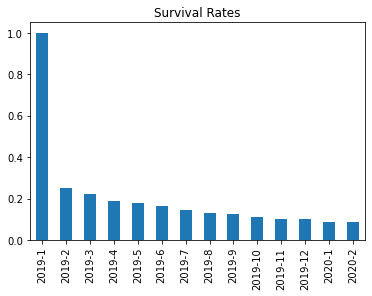

In [7]:
survival_rates["Survival Rate"].plot(kind="bar")
plt.title("Survival Rates")
plt.show()

In [8]:
survival_rates_all = survival_rates.copy()

In [9]:
survival_rates = survival_rates_all[0:9]

In [10]:
survival_rates[0:9]

,Number of Custumer,Survival Rate,term
2019-1,10000,1.0000,0
2019-2,2521,0.2521,1
2019-3,2217,0.2217,2
2019-4,1881,0.1881,3
2019-5,1761,0.1761,4
2019-6,1659,0.1659,5
2019-7,1467,0.1467,6
2019-8,1317,0.1317,7
2019-9,1266,0.1266,8


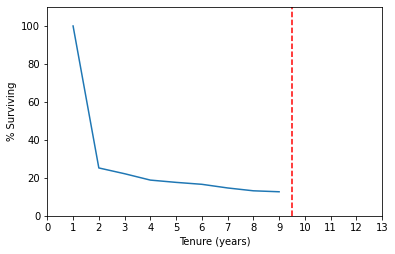

In [11]:
X = survival_rates.term.values.reshape(-1, 1)
y = survival_rates["Survival Rate"].values
fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
#ax.set_title('axes title')
ax.set_xlabel('Tenure (years)')
ax.set_ylabel('% Surviving')
ax.plot(X+1,y*100)
ax.axvline(x=9.5, color='r', linestyle='--')
ax.axis([0, 13, 0, 110])
ax.set_xticks(np.arange(0, 14, 1.0))
plt.show()

### Linear

In [12]:
X = survival_rates.term.values.reshape(-1, 1)
y = survival_rates["Survival Rate"].values
regressor1 = LinearRegression()
regressor1.fit(X,y)
#model:
print("y =", round(regressor1.intercept_,3), "+ (" ,regressor1.coef_[0], ") t" )
print("R2:",round(regressor1.score(X, y),3))

y = 0.536 + ( -0.06711666666666666 ) t
R2: 0.438


### Quadratic

In [13]:
X = np.vstack((survival_rates.term.values, survival_rates.term.values**2)).T
y = survival_rates["Survival Rate"].values

In [14]:
regressor2 = LinearRegression()
regressor2.fit(X,y)
#model:
      
print(f"y = {round(regressor2.intercept_,3)} + ( {round(regressor2.coef_[0],3)} ) t + ( {round(regressor2.coef_[1],3)} ) t2") 
print("R2:",round(regressor2.score(X, y),3))


y = 0.756 + ( -0.255 ) t + ( 0.024 ) t2
R2: 0.715


### Exponantial

In [15]:
X = survival_rates.term.values.reshape(-1, 1)
y = np.log(survival_rates["Survival Rate"].values)

In [16]:
regressor3 = LinearRegression()
regressor3.fit(X,y)
#model:
print("ln(y) =", round(regressor3.intercept_,3), "+ (" ,round(regressor3.coef_[0],3), ") t" )
print("R2:",round(regressor3.score(X, y),3))

ln(y) = -0.822 + ( -0.186 ) t
R2: 0.655


### Model Fit


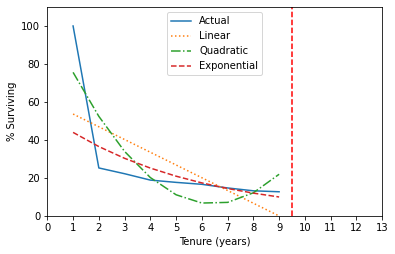

In [17]:
#linear,exp input
X = survival_rates.term.values.reshape(-1, 1)
#quad input
X1 = np.vstack((survival_rates.term.values, survival_rates.term.values**2)).T
y = survival_rates["Survival Rate"].values
fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
#ax.set_title('axes title')
ax.set_xlabel('Tenure (years)')
ax.set_ylabel('% Surviving')
ax.axvline(x=9.5, color='r', linestyle='--')
ax.axis([0, 13, 0, 110])
ax.set_xticks(np.arange(0, 14, 1.0))
#actual
ax.plot(X+1,100*y, label="Actual",linestyle='-')
#linear
ax.plot(X+1,100*regressor1.predict(X), label="Linear", linestyle=':')
#quad
ax.plot(X+1,100*regressor2.predict(X1), label="Quadratic", linestyle='-.')
#exp
ax.plot(X+1,100*np.exp(regressor3.predict(X)), label="Exponential", linestyle='--')
ax.legend(loc='best')
plt.show()

### Predictions

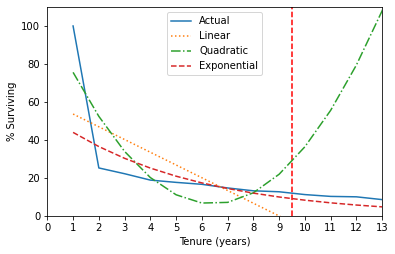

In [19]:
#linear,exp input
X = survival_rates_all.term.values.reshape(-1, 1)
#quad input
X1 = np.vstack((survival_rates_all.term.values, survival_rates_all.term.values**2)).T
y = survival_rates_all["Survival Rate"].values
fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
#ax.set_title('axes title')
ax.set_xlabel('Tenure (years)')
ax.set_ylabel('% Surviving')
ax.axvline(x=9.5, color='r', linestyle='--')
ax.axis([0, 13, 0, 110])
ax.set_xticks(np.arange(0, 14, 1.0))
#actual
ax.plot(X+1,100*y, label="Actual",linestyle='-')
#linear
ax.plot(X+1,100*regressor1.predict(X), label="Linear", linestyle=':')
#quad
ax.plot(X+1,100*regressor2.predict(X1), label="Quadratic", linestyle='-.')
#exp
ax.plot(X+1,100*np.exp(regressor3.predict(X)), label="Exponential", linestyle='--')
ax.legend(loc='best')
plt.show()

### Geometric Model
a) assuming each year, every customer purchases with probability

In [46]:
def GeoLL(theta,sData):
    N=len(sData)
    nCust=sData["Number of Custumer"].values

    nLost=np.zeros(N)
    nLost[0]=0
    for k in range(1,N):
        nLost[k]= nCust[k-1]-nCust[k]

    P_die=np.zeros(N)
    for k in range(1,N):
        P_die[k]= theta*((1-theta)**(k-1))

    S_t=np.zeros(N)
    S_t[0]=1
    for k in range(1,N):
        S_t[k]= S_t[k-1]-P_die[k]

    LL=0
    for k in range(1,N):
        LL+= np.log(P_die[k])* nLost[k]
    LL+=np.log(S_t[-1])* nCust[-1]
    return -LL

In [47]:
survival_rates

,Number of Custumer,Survival Rate,term
2019-1,10000,1.0000,0
2019-2,2521,0.2521,1
2019-3,2217,0.2217,2
2019-4,1881,0.1881,3
2019-5,1761,0.1761,4
2019-6,1659,0.1659,5
2019-7,1467,0.1467,6
2019-8,1317,0.1317,7
2019-9,1266,0.1266,8


In [62]:
initial_guess = [0.5]
bnds = ((0.001, 0.999),)
res= optimize.minimize(GeoLL,initial_guess,args=(survival_rates),bounds=bnds)
res.x

array([0.38268414])

In [49]:
prob = res.x[0]
N=9
P_die=np.zeros(N)
for k in range(1,N):
 P_die[k]= prob*((1-prob)**(k-1))
S_t=np.zeros(N)
S_t[0]=1
for k in range(1,N):
 S_t[k]= S_t[k-1]-P_die[k]
S_t

array([1.        , 0.61731586, 0.38107888, 0.23524604, 0.14522111,
       0.0896473 , 0.0553407 , 0.03416269, 0.02108917])

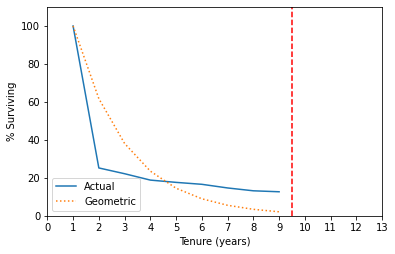

In [50]:
X = survival_rates.term.values.reshape(-1, 1)
y = survival_rates["Survival Rate"].values
fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
#ax.set_title('axes title')
ax.set_xlabel('Tenure (years)')
ax.set_ylabel('% Surviving')
ax.axvline(x=9.5, color='r', linestyle='--')
ax.axis([0, 13, 0, 110])
ax.set_xticks(np.arange(0, 14, 1.0))
#actual
ax.plot(X+1,100*y, label="Actual",linestyle='-')
#geo
ax.plot(X+1,100*S_t, label="Geometric", linestyle=':')
ax.legend(loc='best')
plt.show()

In [56]:
prob = res.x
N=14
P_die=np.zeros(N)
for k in range(1,N):
 P_die[k]= prob*((1-prob)**(k-1))
S_t=np.zeros(N)
S_t[0]=1
for k in range(1,N):
 S_t[k]= S_t[k-1]-P_die[k]
S_t

array([1.        , 0.61731586, 0.38107888, 0.23524604, 0.14522111,
       0.0896473 , 0.0553407 , 0.03416269, 0.02108917, 0.01301868,
       0.00803664, 0.00496114, 0.00306259, 0.00189059])

In [57]:
survival_rates_all

,Number of Custumer,Survival Rate,term
2019-1,10000,1.0000,0
2019-2,2521,0.2521,1
2019-3,2217,0.2217,2
2019-4,1881,0.1881,3
2019-5,1761,0.1761,4
2019-6,1659,0.1659,5
2019-7,1467,0.1467,6
2019-8,1317,0.1317,7
2019-9,1266,0.1266,8
2019-10,1118,0.1118,9


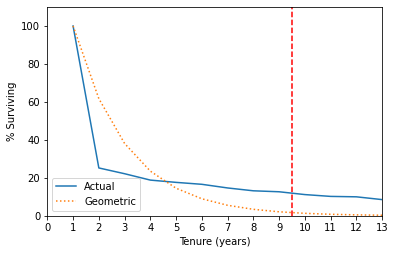

In [58]:
X = survival_rates_all.term.values.reshape(-1, 1)
y = survival_rates_all["Survival Rate"].values

fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
#ax.set_title('axes title')
ax.set_xlabel('Tenure (years)')
ax.set_ylabel('% Surviving')
ax.axvline(x=9.5, color='r', linestyle='--')
ax.axis([0, 13, 0, 110])
ax.set_xticks(np.arange(0, 14, 1.0))
#actual
ax.plot(X+1,100*y, label="Actual",linestyle='-')
#geo
ax.plot(X+1,100*S_t, label="Geometric", linestyle=':')
ax.legend(loc='best')
plt.show()


### Beta Geometric
b) assuming each year customer 𝑖 purchases with probability 𝑝i

In [64]:
def BetaGeoLL(params, sData):
    gamma, delta= params
    N=len(sData)
    nCust=sData["Number of Custumer"].values

    nLost=np.zeros(N)
    nLost[0]=0
    for k in range(1,N):
        nLost[k]= nCust[k-1]-nCust[k]

    P_die=np.zeros(N)
    P_die[1]=gamma/(gamma+delta)
    for k in range(2,N):
        P_die[k]= P_die[k-1]*(delta+k-2)/(gamma+delta+k-1)

    S_t=np.zeros(N)
    S_t[0]=1
    for k in range(1,N):
        S_t[k]= S_t[k-1]-P_die[k]

    LL=0
    for k in range(1,N):
        LL+= np.log(P_die[k])* nLost[k]
    LL+=np.log(S_t[-1])* nCust[-1]
    return -LL

In [65]:
initial_guess = [1, 1]
bnds = ((0.001, None), (0.001, None))
res= optimize.minimize(BetaGeoLL,initial_guess,args=(survival_rates),bounds=bnds)
res.x

array([0.28690088, 0.09744855])

In [66]:
gamma, delta= res.x
N=len(survival_rates_all)
####
P_die=np.zeros(N)
P_die[1]=gamma/(gamma+delta)
for k in range(2,N):
    P_die[k]= P_die[k-1]*(delta+k-2)/(gamma+delta+k-1)
####
S_t=np.zeros(N)
S_t[0]=1
for k in range(1,N):
    S_t[k]= S_t[k-1]-P_die[k]
S_t

array([1.        , 0.25354156, 0.20099608, 0.17681089, 0.16182213,
       0.15123289, 0.14317457, 0.13674057, 0.13142785, 0.12693057,
       0.12305001, 0.11965036, 0.11663501, 0.113933  ])

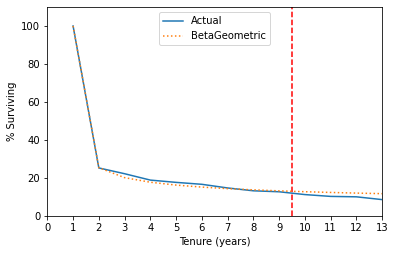

In [67]:
X = survival_rates_all.term.values.reshape(-1, 1)
y = survival_rates_all["Survival Rate"].values

fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
#ax.set_title('axes title')
ax.set_xlabel('Tenure (years)')
ax.set_ylabel('% Surviving')
ax.axvline(x=9.5, color='r', linestyle='--')
ax.axis([0, 13, 0, 110])
ax.set_xticks(np.arange(0, 14, 1.0))
#actual
ax.plot(X+1,100*y, label="Actual",linestyle='-')
#geo
ax.plot(X+1,100*S_t, label="BetaGeometric", linestyle=':')
ax.legend(loc='best')
plt.show()

### Pareto NBD
d) assuming each year customer purchases with probability 𝑝𝑖 and churns with probability 𝜃𝑖

In [3]:
import lifetimes

In [13]:
data_melt = data.melt( id_vars=["Customer ID"], 
          var_name="Month",
          value_name='trx_flag',)
data_melt["Month"] = pd.to_datetime(data_melt["Month"])
data_melt = data_melt.sort_values(["Customer ID","Month"], ascending=[True, True])

In [28]:
data_melt

,Customer ID,Month,trx_flag
0,1,2019-01-01,1
10000,1,2019-02-01,0
20000,1,2019-03-01,0
30000,1,2019-04-01,0
40000,1,2019-05-01,0
...,...,...,...
99999,10000,2019-10-01,1
109999,10000,2019-11-01,0
119999,10000,2019-12-01,0
129999,10000,2020-01-01,0


In [37]:
trx_data = data_melt[data_melt.trx_flag==1].drop("trx_flag", axis=1)
summary = lifetimes.utils.summary_data_from_transaction_data(trx_data,
                                                   customer_id_col="Customer ID",
                                                  datetime_col="Month",
                                                             freq='M')


In [38]:
summary

,frequency,recency,T
Customer ID,,,
1,0.0,0.000000,13.010534
2,0.0,0.000000,13.010534
3,0.0,0.000000,13.010534
4,1.0,1.938438,13.010534
5,3.0,10.973531,13.010534
...,...,...,...
9996,2.0,5.946734,13.010534
9997,1.0,1.018501,13.010534
9998,1.0,4.961087,13.010534


In [39]:
nbd = lifetimes.ParetoNBDFitter(penalizer_coef=0.0)

In [40]:
nbd.fit(summary["frequency"], summary["recency"], summary["T"] )

<lifetimes.ParetoNBDFitter: fitted with 10000 subjects, alpha: 20.44, beta: 6.89, r: 4.88, s: 0.87>

In [41]:
nbd

<lifetimes.ParetoNBDFitter: fitted with 10000 subjects, alpha: 20.44, beta: 6.89, r: 4.88, s: 0.87>

In [49]:
from lifetimes.plotting import plot_period_transactions

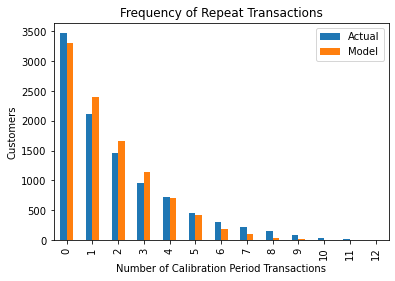

In [52]:
plot_period_transactions(nbd, max_frequency=13)

### Cohort retention rates over months


In [7]:
retention_rate = data.drop("Customer ID", axis=1).sum()
retention_rate = pd.DataFrame(retention_rate).rename({0:"Number of Custumer"},axis=1)
retention_rate["Retention Rate"] = (retention_rate["Number of Custumer"] / retention_rate["Number of Custumer"].shift(1))

In [8]:
retention_rate

,Number of Custumer,Retention Rate
2019-1,10000,NaN
2019-2,2521,0.252100
2019-3,2217,0.879413
2019-4,1881,0.848444
2019-5,1761,0.936204
2019-6,1659,0.942078
2019-7,1467,0.884268
2019-8,1317,0.897751
2019-9,1266,0.961276
2019-10,1118,0.883096


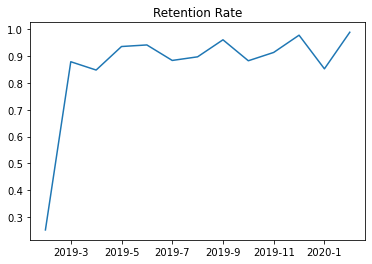

In [9]:
retention_rate["Retention Rate"].plot()
plt.title("Retention Rate")
plt.show()

## Prediction of total number of transactions per month

In [10]:
monthly = data.drop("Customer ID", axis=1).sum()
mothly_train = monthly.iloc[0:9]
mothly_test = monthly.iloc[9:]

In [11]:
mothly_train_retention = pd.DataFrame(mothly_train).rename({0:"Number of Custumer"},axis=1)
mothly_train_retention["Retention Rate"] = (mothly_train_retention["Number of Custumer"] / mothly_train_retention["Number of Custumer"].shift(1))

In [12]:
last_three_month_avg_retention = mothly_train_retention[-3:]["Retention Rate"].mean()

In [13]:
pred = pd.concat([pd.DataFrame(mothly_train, columns=["train"]), 
           pd.DataFrame(mothly_test, columns=["test"]) ])
pred = pred.fillna(0)

In [14]:
for row in range(len(pred)):
    if pred.iloc[row, 0] == 0:
        pred.iloc[row, 0] = pred.iloc[row -1, 0] * last_three_month_avg_retention

In [15]:
pred = pred[9:]

In [16]:
metrics.mean_squared_error(pred.test, pred.train)

1233.3089298776017

In [167]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred) / y_true)

In [20]:
mean_absolute_percentage_error(pred.test, pred.train)

0.036391585040894826

**Benchmark MSE: 1233, MAPE:0.036**

## Prediction of cumulative transactions (over months)

In [32]:
pred.sum()

train    4878.946372
test     4837.000000
dtype: float64

In [31]:
pred.sum().train - pred.sum().test

41.94637158778005

In [28]:
np.power((pred.sum().train - pred.sum().test),2)

1759.4980893801214

In [25]:
mean_absolute_percentage_error(pred.sum().test, pred.sum().train)

0.008671980894724013

## Regression Model

In [218]:
train = data.drop("Customer ID",axis=1).iloc[:,0:9]

In [219]:
data_melt = data.melt( id_vars=["Customer ID"], 
          var_name="Month",
          value_name='t',)
data_melt["Month"] = pd.to_datetime(data_melt["Month"])
data_melt = data_melt.sort_values(["Customer ID","Month"], ascending=[True, True])

In [220]:
data_melt["t-1"] = data_melt.groupby("Customer ID").shift(1).t
data_melt["t-2"] = data_melt.groupby("Customer ID").shift(2).t
data_melt["t-3"] = data_melt.groupby("Customer ID").shift(3).t

In [221]:
data_melt = data_melt.dropna(subset=["t", "t-1", "t-2", "t-3"])

In [222]:
train_set = data_melt[data_melt.Month <= "2019-09-01"]
test_set = data_melt[data_melt.Month == "2019-10-01"]
train_set = train_set.set_index(["Customer ID", "Month"])
test_set = test_set.set_index(["Customer ID", "Month"])

In [223]:
x_train, y_train = train_set.drop(["t"], axis=1), train_set.t
x_test, y_test = test_set.drop(["t"], axis=1), test_set.t

In [224]:
model = LogisticRegression()

In [225]:
model.fit(x_train,y_train)

LogisticRegression()

In [226]:
y_train_pred = pd.DataFrame(model.predict_proba(x_train))[1].apply(lambda x: 1 if x >= 0.25 else 0)

In [227]:
y_train_pred.sum()

10288

In [228]:
train_set = train_set.reset_index()
train_set["pred"] = y_train_pred

In [229]:
train_set

,Customer ID,Month,t,t-1,t-2,t-3,pred
0,1,2019-04-01,0,0.0,0.0,1.0,0
1,1,2019-05-01,0,0.0,0.0,0.0,0
2,1,2019-06-01,0,0.0,0.0,0.0,0
3,1,2019-07-01,0,0.0,0.0,0.0,0
4,1,2019-08-01,0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...
59995,10000,2019-05-01,1,0.0,0.0,0.0,0
59996,10000,2019-06-01,0,1.0,0.0,0.0,0
59997,10000,2019-07-01,0,0.0,1.0,0.0,0
59998,10000,2019-08-01,0,0.0,0.0,1.0,0


In [230]:
metrics.accuracy_score(train_set.t, train_set.pred)

0.7724833333333333

In [237]:
metrics.confusion_matrix(train_set.t, train_set.pred)
train_set.t.sum(), train_set.pred.sum()

(9351, 10288)

In [232]:
y_test_pred = pd.DataFrame(model.predict_proba(x_test))[1].apply(lambda x: 1 if x >= 0.25 else 0)

In [234]:
test_set = test_set.reset_index()
test_set["pred"] = y_test_pred

In [239]:
metrics.accuracy_score(test_set.t, test_set.pred)

0.8549

In [235]:
metrics.confusion_matrix(test_set.t, test_set.pred)

array([[8227,  655],
       [ 796,  322]], dtype=int64)

In [236]:
test_set.t.sum(), test_set.pred.sum()

(1118, 977)